<a href="https://colab.research.google.com/github/knoppin1/DATA-690-WANG/blob/master/Assignment_08/Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 8

## Ken Noppinger (knoppin1@umbc.edu)

Instructions

For this assignment , we will use the college scorecard dataset. 
<pre>
From the 22 individual school year data files, randomly (using Python) select one file. 
Only read the column "TUITIONFEE_IN" frm this file into a data frame.
Find out how many observations this data frame has.
Find out how many observations that have missing value. Drop those observations.
Find out how many observations that have value of zero. Drop those observations.
Calculate the mean of the tuition.
Randomly select one observation, find out the tuition of that observation.
Calculate the different between the tuition of this observation and the average tuition (mean) off all observations above.
Randomly select another observation and repeat the above.
Randomly select another observation and repeat the above.
Randomly select 5 observations, display the tuition of these observation.
Calculate the average of these 5 observations
Calculate the different between the average tuition of thes 5 observations and the average tuition (mean) off all observations above.
Randomly select another 5 observations and repeat the above.
Randomly select another 5 observation and repeat the above.

Randomly select 10 observations, display the tuition of these observation.
Calculate the average of these 10 observations
Calculate the different between the average tuition of thes 10 observations and the average tuition (mean) off all observations above.
Randomly select another 10 observations and repeat the above.
Randomly select another 10 observation and repeat the above.


Randomly select 20 observations, display the tuition of these observation.
Calculate the average of these 20 observations
Calculate the different between the average tuition of thes 10 observations and the average tuition (mean) off all observations above.
Randomly select another 20 observations and repeat the above.
Randomly select another 20 observation and repeat the above.

Randomly select 30 observations, display the tuition of these observation.
Calculate the average of these 30 observations
Calculate the different between the average tuition of thes 10 observations and the average tuition (mean) off all observations above.
Randomly select another 30 observations and repeat the above.
Randomly select another 30 observation and repeat the above.

Write a function that take an input x (number of observations). 
The function will perform the following:

Randomly select x observations, display the tuition of these observations.
Calculate the average of these x observations
Calculate the different between the average tuition of these x observations and the average tuition (mean) off all observations above.
Display the difference.
<pre>


# 1 - Import necessary libraries

In [1]:
import os
from random import *
import pandas as pd
import matplotlib.pyplot as plt

# Libraries below are used in retrieving the zip file
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

# 2 - Retrieve List of 22 files with Yearly College Data
- Get zip file with College Data
- Unzip the file
- Filter out other files
- Display the names of these 22 files

### Programmatic unzip 
- Retrieve the zip file from it's URL instead of download, manual unzip, and upload.
- Unzip the "CollegeScorecard_Raw_data.zip" file.
- Reference: https://svaderia.github.io/articles/downloading-and-unzipping-a-zipfile/
ZIP_URL = 'https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip'

In [2]:
ZIP_URL = 'https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip'
with urlopen(ZIP_URL) as zip_response:
    with ZipFile(BytesIO(zip_response.read())) as zip_file:
        zip_file.extractall()

### Directory Listing

In [3]:
contents = os.listdir()
WORKING_DIRECTORY = os.getcwd()
UNZIPPED_DIRECTORY = "CollegeScorecard_Raw_Data"
if UNZIPPED_DIRECTORY in contents:
    directory_path = WORKING_DIRECTORY + '/' + UNZIPPED_DIRECTORY
    unzipped_contents = os.listdir(path=directory_path)
unzipped_contents

['MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2012_13_PP.csv',
 'data.yaml',
 'MERGED2006_07_PP.csv',
 'MERGED2011_12_PP.csv',
 'Crosswalks.zip',
 'MERGED2000_01_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2004_05_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2008_09_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2017_18_PP.csv',
 '.DS_Store',
 'MERGED1998_99_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2018_19_PP.csv']

### Filter 
- Filter out non-yearly data files 
- Display the 22 yearly data file names

In [4]:
MERGED_SUBSTRING = "MERGED"
yearly_data_files = [file_name for file_name in unzipped_contents if MERGED_SUBSTRING in file_name]
yearly_data_files

['MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2018_19_PP.csv']

# 3 - Randomly select one yearly data file

In [5]:
# Random index
index = randint(0, len(yearly_data_files))
index

23

In [6]:
# Display the file name
yearly_data_file = yearly_data_files[21]
yearly_data_file

'MERGED2009_10_PP.csv'

# 4 - Read Yearly Data File

Only read two columns from file
- college name (INSTNM) 
- in state tuition ("TUITIONFEE_IN")

In [7]:
# Set columns
columns_of_interest = ["INSTNM", "TUITIONFEE_IN"]

# Set file path
file = directory_path + '/' + yearly_data_file

# Read CSV into dataframe
df = pd.read_csv(file, header = 0, usecols = columns_of_interest) 
df.shape

(7217, 2)

In [8]:
# Show some rows
df.head()

,INSTNM,TUITIONFEE_IN
0,Community College of the Air Force,NaN
1,Alabama A & M University,4692.0
2,University of Alabama at Birmingham,5096.0
3,Amridge University,8000.0
4,University of Alabama in Huntsville,6510.0


In [9]:
# Display summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7217 entries, 0 to 7216
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         7217 non-null   object 
 1   TUITIONFEE_IN  4289 non-null   float64
dtypes: float64(1), object(1)
memory usage: 112.9+ KB


# 5 - Find Observations with Missing Values

In [10]:
# Find out how many observations have missing value.
df.isnull().sum()

INSTNM              0
TUITIONFEE_IN    2928
dtype: int64

# 6 - Drop Observations with Missing Values

In [11]:
# Drop those observations with missing value
df = df.dropna()

# Display the number of observations afterward
df.isnull().sum()

INSTNM           0
TUITIONFEE_IN    0
dtype: int64

# 7 - Find Observations with No Tuition. 

In [12]:
# Show observations with no tuition
df.query('TUITIONFEE_IN == 0.0')

,INSTNM,TUITIONFEE_IN
664,United States Air Force Academy,0.0
1770,United States Naval Academy,0.0
2851,United States Merchant Marine Academy,0.0
2852,United States Military Academy,0.0
2859,Webb Institute,0.0


In [13]:
# Show count
df.query('TUITIONFEE_IN == 0.0').shape[0]

5

# 8 - Drop Observations with No Tuition

In [14]:
# Drop observations with no tuition
df = df[df.TUITIONFEE_IN != 0.0]

# Display the number of observations afterward
df.query('TUITIONFEE_IN == 0.0').shape[0]

0

# 9 - Calculate and Display Mean Tuition

In [15]:
# Create function for displaying numbers as currency
def num_to_currency(num):
    return '${:0,.2f}'.format(num).replace('$-','-$')

# Test it
num_to_currency(555.54)    

'$555.54'

In [16]:
# Mean (average) of the tuitions of all the remaining observations 
mean_tuition = round(df.TUITIONFEE_IN.mean(),2)

# Display Mean Tuition
num_to_currency(mean_tuition)

'$12,067.69'

# 10 - Randomly Select an Observation from the Dataframe

In [17]:
# Display the tuition of a random observation. 
single_sample_tuition = df.sample(1).iloc[0]['TUITIONFEE_IN']
num_to_currency(single_sample_tuition)

'$19,000.00'

# 11 - Calculate Sample Difference from Mean

In [18]:
# Calculate the difference between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
single_sample_diff = single_sample_tuition - mean_tuition

# Display the difference
num_to_currency(single_sample_diff)

'$6,932.31'

# 12 - Repeat Sampling and Difference from Mean Calculation Several Times

In [19]:
# Repeat 10 to 11 several times get the feel of the size of the difference in means
print('Mean:\t', num_to_currency(mean_tuition))
for i in range(0,10):
    sample_tuition = round(df.sample(1).iloc[0]['TUITIONFEE_IN'],2)
    diff = sample_tuition - mean_tuition
    print('Sample:\t', num_to_currency(sample_tuition), '\tDiff:\t', num_to_currency(diff))

Mean:	 $12,067.69
Sample:	 $21,876.00 	Diff:	 $9,808.31
Sample:	 $17,148.00 	Diff:	 $5,080.31
Sample:	 $14,150.00 	Diff:	 $2,082.31
Sample:	 $13,275.00 	Diff:	 $1,207.31
Sample:	 $10,105.00 	Diff:	 -$1,962.69
Sample:	 $38,267.00 	Diff:	 $26,199.31
Sample:	 $25,450.00 	Diff:	 $13,382.31
Sample:	 $1,680.00 	Diff:	 -$10,387.69
Sample:	 $12,550.00 	Diff:	 $482.31
Sample:	 $16,075.00 	Diff:	 $4,007.31


# 13 - Randomly Select and Display Tuition for 20 Observations

In [20]:
# Randomly select 20 observations
samples = df.sample(20)
samples

,INSTNM,TUITIONFEE_IN
7170,Harrisburg Area Community College-Lebanon,3480.0
3816,Freed-Hardeman University,14998.0
6760,Broadview University-Orem,14400.0
7086,Strayer University-Salt Lake Campus,13065.0
6414,University of Phoenix-South Carolina,8568.0
3231,Lincoln College of Technology-Dayton,10500.0
1189,Northeastern Illinois University,7082.0
5016,King's College,12920.0
5021,Southwest Collegiate Institute for the Deaf,1712.0
4514,Inter American University of Puerto Rico-Bayamon,4428.0


In [21]:
# Display the tuition of these observations. 
for tuition in [num_to_currency(tuition) for tuition in samples['TUITIONFEE_IN']]:
    print(tuition)

$3,480.00
$14,998.00
$14,400.00
$13,065.00
$8,568.00
$10,500.00
$7,082.00
$12,920.00
$1,712.00
$4,428.00
$28,925.00
$974.00
$5,670.00
$1,069.00
$13,065.00
$10,600.00
$4,100.00
$3,878.00
$8,489.00
$7,870.00


# 14 - Calculate and Display Mean Tuition of the 20 Observations

In [22]:
# Calculate the mean tuition of these 20 observations
sample_mean_tuition = samples['TUITIONFEE_IN'].mean()

# Display it.
num_to_currency(sample_mean_tuition)

'$8,789.65'

# 15 - Calculate Difference Between Sample and Population Tuition Averages

In [23]:
# Calculate the difference between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
diff = sample_mean_tuition - mean_tuition

# Display the difference
print('Overall Mean Tuition:', '\t', num_to_currency(mean_tuition))
print('Sample Mean Tuition:', '\t', num_to_currency(sample_mean_tuition))
print('Difference:', '\t', '\t', num_to_currency(diff))

Overall Mean Tuition: 	 $12,067.69
Sample Mean Tuition: 	 $8,789.65
Difference: 	 	 -$3,278.04


# 16 - Repeat Sampling and Mean Differences Calculation Several Times

In [24]:
# Repeat 13 to 15 several times and get the feel of the size of the difference in means 
for i in range(0,10):
    samples = df.sample(20)
    sample_mean_tuition = samples['TUITIONFEE_IN'].mean()
    diff = sample_mean_tuition - mean_tuition
    print('Sample Mean Tuition:', '\t', num_to_currency(sample_mean_tuition), '\t', 'Diff:', '\t', num_to_currency(diff))

Sample Mean Tuition: 	 $11,062.50 	 Diff: 	 -$1,005.19
Sample Mean Tuition: 	 $9,474.80 	 Diff: 	 -$2,592.89
Sample Mean Tuition: 	 $12,482.20 	 Diff: 	 $414.51
Sample Mean Tuition: 	 $14,404.75 	 Diff: 	 $2,337.06
Sample Mean Tuition: 	 $8,825.65 	 Diff: 	 -$3,242.04
Sample Mean Tuition: 	 $10,929.15 	 Diff: 	 -$1,138.54
Sample Mean Tuition: 	 $9,341.95 	 Diff: 	 -$2,725.74
Sample Mean Tuition: 	 $9,797.30 	 Diff: 	 -$2,270.39
Sample Mean Tuition: 	 $13,389.95 	 Diff: 	 $1,322.26
Sample Mean Tuition: 	 $10,349.90 	 Diff: 	 -$1,717.79


Compare these differences with the differences calculated earlier with just 1 observation.





In [25]:
num_to_currency(single_sample_diff)

'$6,932.31'


***The single sample difference from the mean is greater than the differences observed from larger sample sets.***  

<u>Hunch/conclusion</u>

***I would expect the difference between the two means to approach zero as the sample size increases.***

# 17 - Define Reusable Function

Write a function that take two input parameters:
- x (number of observations) 
- y (the name of the dataframe). 

The function will perform the following: 
- Randomly select x observations from y
- Calculate the mean of these x observations 
- Calculate the mean of all observations
- Calculate the difference between the two means 
- Return the difference

In [26]:
def tuition_diff_for_sample_mean_from_population_mean(x, y):
    
    # Randomly select x observations from y
    samples = y.sample(x)

    # Calculate the mean of these x observations
    sample_mean_tuition = samples['TUITIONFEE_IN'].mean()

    # Calculate the mean of all observations
    overall_mean_tuition = y['TUITIONFEE_IN'].mean()

    # Calculate and return the difference between the two means
    return sample_mean_tuition - overall_mean_tuition

# 18 - Test Reusable Function

In [27]:
# Test the function by passing a sample size and the name of the dataframe
diff = tuition_diff_for_sample_mean_from_population_mean(200, df)

# Display the return of the function
num_to_currency(diff)

'$7.32'

# 19 - Create Sample Sizes List

In [28]:
# Create a list of sequence numbers from 1 to 50, name it "sample_sizes"
sequence_size = 50
sample_sizes = [i for i in range(1, sequence_size + 1)]

# Display it to make sure its members are from 1 to 50
sample_sizes

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

# 20 - Create Means Diff List

In [29]:
# Create an empty list and name it "means_diff" for differences of population mean and sample means
means_diff = []

In [30]:
# Loop through the list sample_sizes:
for size in sample_sizes:

    # Obtain a random sample of that size from the dataframe
    # Calculate the sample mean 
    # Calculate the difference between the population mean and the sample mean
    diff = tuition_diff_for_sample_mean_from_population_mean(size, df)

    # Append the difference to the list "means_diff"
    means_diff.append(diff)

# Display the list "means_diff" after the loop is completed
for diff in means_diff:
    print(num_to_currency(diff))

$28,097.31
$3,185.31
-$415.69
-$4,211.69
$7,446.51
-$2,188.52
-$1,258.83
-$3,555.44
$1,257.42
-$1,220.09
$2,383.13
-$2,447.94
-$356.00
$718.10
-$3,366.56
$1,012.87
$187.96
-$1,223.41
-$110.74
-$3,402.69
-$1,345.02
$2,201.22
-$1,067.56
-$1,934.15
-$986.61
$2,666.31
-$851.32
$1,800.60
-$553.66
$409.18
$686.79
$19.15
$678.58
-$659.51
$2,020.74
-$811.61
-$1,128.20
$148.86
-$484.89
-$244.16
-$1,342.79
$685.45
$805.36
-$2,985.96
-$478.45
-$1,445.34
-$2,300.90
$38.29
-$156.75
-$1,750.97


# 21 - Scatter Plot: Sample Sizes vs. Mean Differences

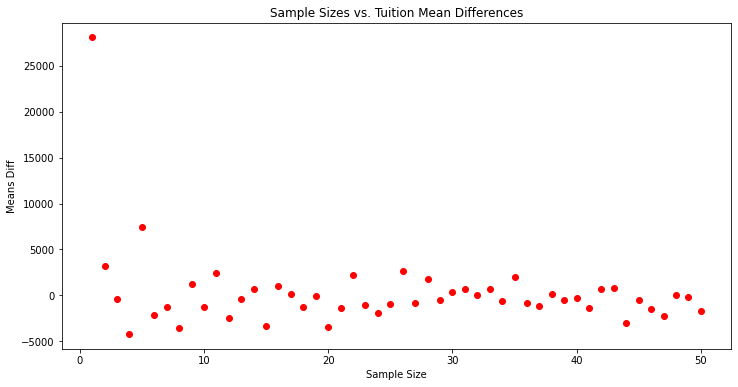

In [31]:
# Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough 
plt.figure(figsize=(12, 6))
plt.scatter(sample_sizes, means_diff, color='r')
plt.xlabel('Sample Size')
plt.ylabel('Means Diff')
plt.title('Sample Sizes vs. Tuition Mean Differences')
plt.show()

# 22 - Repeat Sampling and Mean Differences Plotting Several Times

Repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000 and see how the plot looks.

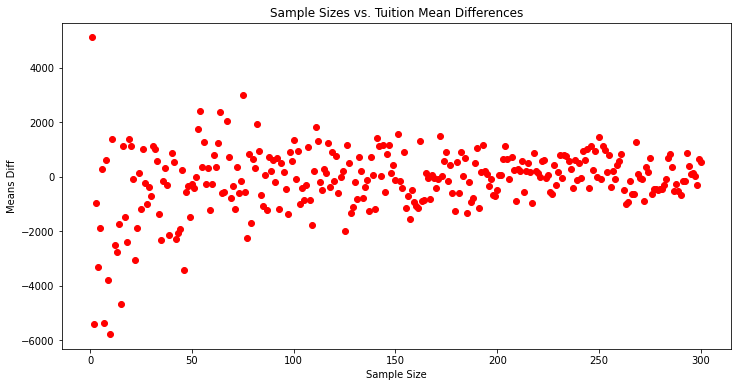

In [32]:
# 300 sample sizes
sequence_size = 300
sample_sizes = [i for i in range(1, sequence_size + 1)]
means_diff = []
for size in sample_sizes:

    # Obtain a random sample of that size from the dataframe
    # Calculate the sample mean 
    # Calculate the difference between the population mean and the sample mean
    diff = tuition_diff_for_sample_mean_from_population_mean(size, df)

    # Append the difference to the list "means_diff"
    means_diff.append(diff)

# Display Scatter Plot    
plt.figure(figsize=(12, 6))
plt.scatter(sample_sizes, means_diff, color='r')
plt.xlabel('Sample Size')
plt.ylabel('Means Diff')
plt.title('Sample Sizes vs. Tuition Mean Differences')
plt.show()

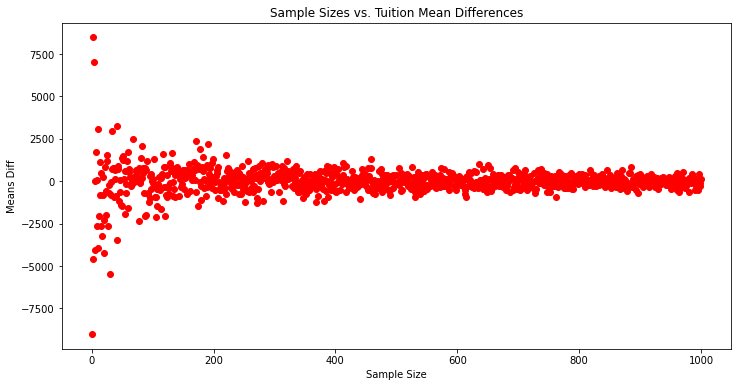

In [33]:
# 1000 sample sizes
sequence_size = 1000
sample_sizes = [i for i in range(1, sequence_size + 1)]
means_diff = []
for size in sample_sizes:

    # Obtain a random sample of that size from the dataframe
    # Calculate the sample mean 
    # Calculate the difference between the population mean and the sample mean
    diff = tuition_diff_for_sample_mean_from_population_mean(size, df)

    # Append the difference to the list "means_diff"
    means_diff.append(diff)

# Display Scatter Plot    
plt.figure(figsize=(12, 6))
plt.scatter(sample_sizes, means_diff, color='r')
plt.xlabel('Sample Size')
plt.ylabel('Means Diff')
plt.title('Sample Sizes vs. Tuition Mean Differences')
plt.show()

<u>Conclusion</u>

***The difference between a sample sizes mean tuition and the population mean tuition does approach zero for larger sample sizes.***

# COMPLETE